<a href="https://colab.research.google.com/github/vaishna-v/DMBI/blob/main/dmbi_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DMBI dataset - BhartiAirtel.csv to DMBI dataset - BhartiAirtel.csv


In [ ]:
import pandas as pd
df = pd.read_csv('DMBI dataset - BhartiAirtel.csv')

print(df.to_string()) 

              Date  Open Price  High Price  Low Price  Close Price         WAP  No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open
0        04-Jun-21      534.80      535.75     531.25       532.70  533.229306      661985.0        12196.0          3.529898e+08              398176.0                      60.15             4.50              -2.10
1        03-Jun-21         NaN      533.35     528.70       532.10  531.013092      735782.0        15452.0          3.907099e+08              479872.0                      65.22             4.65               0.25
2        02-Jun-21      530.10      534.50     528.00       529.60  530.544324      494007.0        11723.0          2.620926e+08              273203.0                      55.30             6.50              -0.50
3        01-Jun-21      538.00      538.00     530.15       532.90  533.446883      501024.0        12404.0          2.672697e+08           

1.Understand the data

In [ ]:
df.describe()


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,183.000000,194.000000,188.000000,190.000000,192.000000,1.920000e+02,194.000000,1.890000e+02,1.910000e+02,195.000000,186.000000,199.000000
mean,507.029508,517.514433,508.475798,511.265263,501.587945,7.708306e+05,13084.654639,3.870867e+08,3.038494e+05,34.809744,14.905645,-2.220352
std,82.866986,72.464943,49.575055,61.594472,96.215557,5.928530e+05,10416.088085,3.064759e+08,2.836813e+05,16.087952,7.337584,9.672284
min,0.000000,0.000000,394.050000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-36.100000
25%,479.000000,487.575000,474.175000,479.725000,477.211813,3.886225e+05,5893.500000,1.877301e+08,9.868900e+04,22.190000,10.312500,-7.225000
50%,523.000000,529.025000,516.800000,522.325000,522.555739,5.984445e+05,11155.000000,3.009207e+08,1.979980e+05,31.850000,13.125000,-2.400000
75%,541.850000,550.375000,538.000000,541.475000,542.827262,1.026912e+06,16895.750000,5.071264e+08,4.264830e+05,42.695000,17.575000,2.725000
max,618.300000,623.000000,599.550000,608.800000,612.794431,3.906544e+06,64922.000000,1.797225e+09,1.445829e+06,84.810000,46.050000,29.750000


2.Clean the data from redundancies

In [ ]:
df.shape

(199, 13)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(120, 13)

In [ ]:
print(df.to_string())

              Date  Open Price  High Price  Low Price  Close Price         WAP  No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open
0        04-Jun-21      534.80      535.75     531.25       532.70  533.229306      661985.0        12196.0          3.529898e+08              398176.0                      60.15             4.50              -2.10
2        02-Jun-21      530.10      534.50     528.00       529.60  530.544324      494007.0        11723.0          2.620926e+08              273203.0                      55.30             6.50              -0.50
3        01-Jun-21      538.00      538.00     530.15       532.90  533.446883      501024.0        12404.0          2.672697e+08              232077.0                      46.32             7.85              -5.10
4        31-May-21      525.80      535.80     525.40       534.95  532.479380      927325.0        19141.0          4.937814e+08           

3. Understand relationship between the variables.

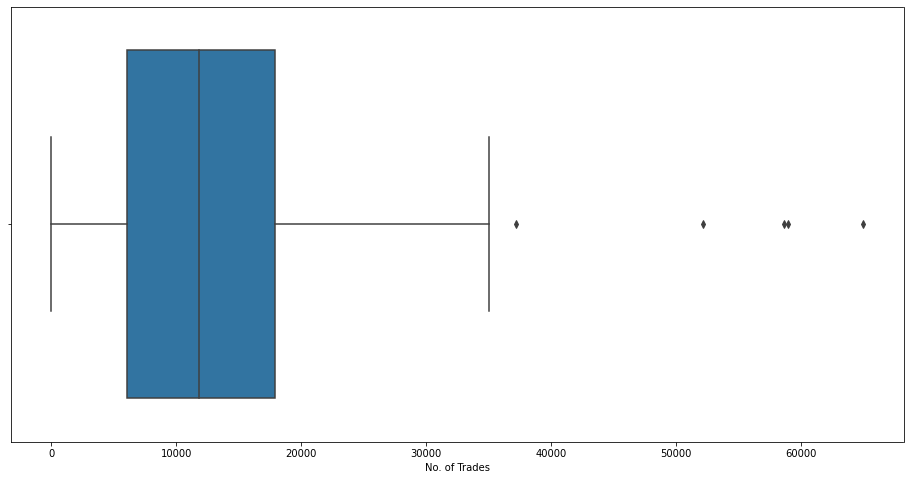

In [ ]:
#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,8)) #(width,height)
sns.boxplot(x='No. of Trades', data=df);

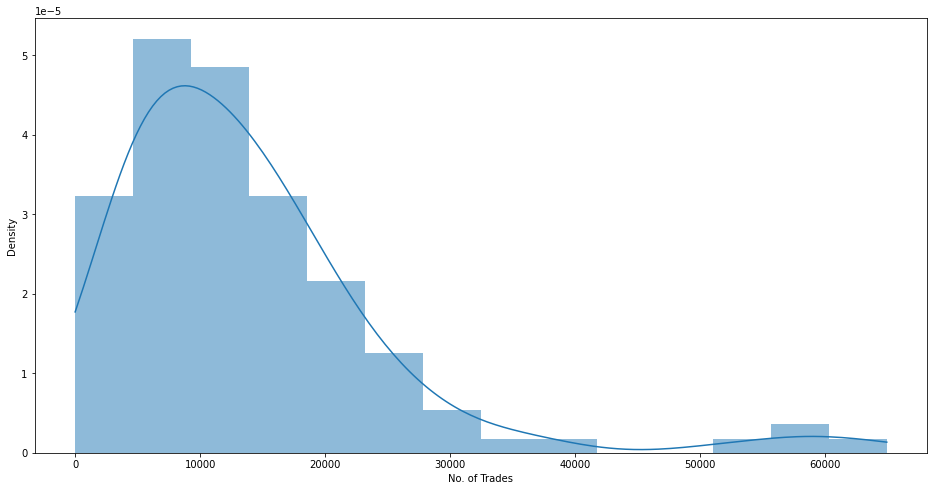

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df['No. of Trades'],kde=True, stat="density", linewidth=0)


In [ ]:
#Finding Quartiles and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open Price                   6.610000e+01
High Price                   6.843750e+01
Low Price                    6.640000e+01
Close Price                  6.726250e+01
WAP                          6.645981e+01
No.of Shares                 5.936132e+05
No. of Trades                1.178625e+04
Total Turnover (Rs.)         3.146205e+08
Deliverable Quantity         2.838705e+05
% Deli. Qty to Traded Qty    2.197500e+01
Spread High-Low              8.275000e+00
Spread Close-Open            1.052500e+01
dtype: float64


In [ ]:
IQR["No. of Trades"], Q1["No. of Trades"], Q3["No. of Trades"]

(11786.25, 6070.25, 17856.5)

In [ ]:
cut_off = IQR["No. of Trades"] * 1.5
lower, upper = Q1["No. of Trades"] - cut_off, Q3["No. of Trades"] + cut_off

In [ ]:
# getting the outliers
outliers = pd.DataFrame([v for k,v in df.iterrows() if v["No. of Trades"] < lower or v["No. of Trades"] > upper])
outliers.head(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
95,13-Jan-21,588.00,601.80,566.70,578.25,586.473689,3064460.0,58588.0,1.797225e+09,491261.0,16.03,35.10,-9.75
148,28-Oct-20,446.40,487.80,443.20,451.45,458.854950,3906544.0,52155.0,1.792537e+09,1028165.0,26.32,44.60,5.05
157,15-Oct-20,413.35,415.40,395.10,399.15,405.692044,2217563.0,37152.0,8.996477e+08,1125586.0,50.76,20.30,-14.20
172,23-Sep-20,470.00,470.00,423.95,433.90,439.977570,2554302.0,64922.0,1.123836e+09,954884.0,37.38,46.05,-36.10
188,01-Sep-20,517.00,555.05,514.05,546.75,539.492535,3316505.0,58949.0,1.789230e+09,1078139.0,32.51,41.00,29.75


In [ ]:
outliers.shape


(5, 13)

In [ ]:
df_new = pd.DataFrame([v for k,v in df.iterrows() if v["No. of Trades"] >= lower and v["No. of Trades"] <= upper])

In [ ]:
df_new

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,04-Jun-21,534.8,535.75,531.25,532.70,533.229306,661985.0,12196.0,352989802.0,398176.0,60.15,4.50,-2.10
2,02-Jun-21,530.1,534.50,528.00,529.60,530.544324,494007.0,11723.0,262092610.0,273203.0,55.30,6.50,-0.50
3,01-Jun-21,538.0,538.00,530.15,532.90,533.446883,501024.0,12404.0,267269691.0,232077.0,46.32,7.85,-5.10
4,31-May-21,525.8,535.80,525.40,534.95,532.479380,927325.0,19141.0,493781441.0,549560.0,59.26,10.40,9.15
5,28-May-21,520.0,528.50,520.00,523.65,524.334381,567586.0,13541.0,297604854.0,224678.0,39.58,8.50,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,31-Aug-20,520.0,522.05,508.75,513.95,514.817005,1314655.0,24949.0,676806750.0,366701.0,27.89,13.30,-6.05
193,25-Aug-20,533.0,536.00,526.00,528.60,529.840849,584833.0,11525.0,309868413.0,199347.0,34.09,10.00,-4.40
194,24-Aug-20,520.0,532.30,508.50,527.20,518.264593,593765.0,9251.0,307727376.0,107814.0,18.16,23.80,7.20
197,19-Aug-20,529.4,539.80,527.20,536.10,532.108039,1080877.0,13782.0,575143341.0,517438.0,47.87,12.60,6.70


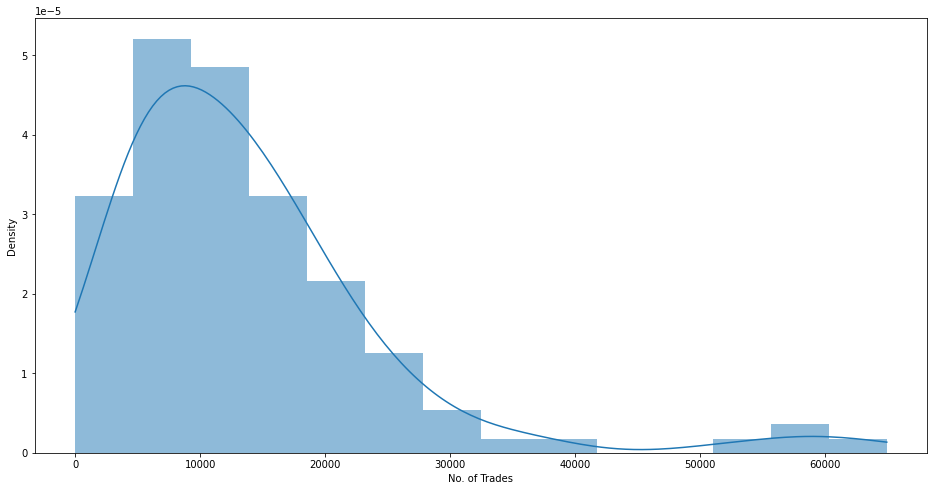

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df['No. of Trades'],kde=True, stat="density", linewidth=0)

In [ ]:
 df_new.mean()


<ipython-input-28-63b8fce5933e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.mean()


Open Price                   5.149552e+02
High Price                   5.152004e+02
Low Price                    5.099974e+02
Close Price                  5.166678e+02
WAP                          5.032875e+02
No.of Shares                 7.140415e+05
No. of Trades                1.211061e+04
Total Turnover (Rs.)         3.733086e+08
Deliverable Quantity         2.920477e+05
% Deli. Qty to Traded Qty    3.610348e+01
Spread High-Low              1.466043e+01
Spread Close-Open           -2.190000e+00
dtype: float64

In [ ]:
df_new.median()

<ipython-input-29-46a4466eb864>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.median()


Open Price                   5.258000e+02
High Price                   5.279000e+02
Low Price                    5.164000e+02
Close Price                  5.218500e+02
WAP                          5.217032e+02
No.of Shares                 6.135030e+05
No. of Trades                1.161700e+04
Total Turnover (Rs.)         3.335421e+08
Deliverable Quantity         2.203600e+05
% Deli. Qty to Traded Qty    3.379000e+01
Spread High-Low              1.300000e+01
Spread Close-Open           -2.550000e+00
dtype: float64

In [ ]:
df_new.mode()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,01-Dec-20,520.0,0.0,494.0,397.25,0.0,0.0,12404.0,0.000000e+00,26969.0,27.82,9.90,-0.2
1,01-Feb-21,NaN,460.0,518.7,415.35,NaN,NaN,NaN,8.469065e+07,39225.0,NaN,10.60,NaN
2,01-Jan-21,NaN,598.0,520.1,418.85,NaN,NaN,NaN,9.167687e+07,41267.0,NaN,11.50,NaN
3,01-Jun-21,NaN,NaN,NaN,420.90,NaN,NaN,NaN,1.014683e+08,41497.0,NaN,13.85,NaN
4,02-Dec-20,NaN,NaN,NaN,422.50,NaN,NaN,NaN,1.127453e+08,44715.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,31-Dec-20,NaN,NaN,NaN,594.05,NaN,NaN,NaN,7.856677e+08,788912.0,NaN,NaN,NaN
111,31-Mar-21,NaN,NaN,NaN,596.20,NaN,NaN,NaN,8.157482e+08,813532.0,NaN,NaN,NaN
112,31-May-21,NaN,NaN,NaN,599.65,NaN,NaN,NaN,8.510152e+08,828200.0,NaN,NaN,NaN
113,7-April-2021,NaN,NaN,NaN,600.35,NaN,NaN,NaN,9.634882e+08,1164349.0,NaN,NaN,NaN


In [ ]:
print(df_new.var())


Open Price                   4.772208e+03
High Price                   7.082420e+03
Low Price                    2.565260e+03
Close Price                  2.576233e+03
WAP                          9.058380e+03
No.of Shares                 3.878179e+11
No. of Trades                1.253875e+08
Total Turnover (Rs.)         1.011844e+17
Deliverable Quantity         7.902877e+10
% Deli. Qty to Traded Qty    2.581496e+02
Spread High-Low              6.383237e+01
Spread Close-Open            1.024076e+02
dtype: float64


<ipython-input-31-726038a034a5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


In [ ]:
print(df_new.std())

Open Price                   6.908117e+01
High Price                   8.415712e+01
Low Price                    5.064839e+01
Close Price                  5.075661e+01
WAP                          9.517552e+01
No.of Shares                 6.227503e+05
No. of Trades                1.119766e+04
Total Turnover (Rs.)         3.180949e+08
Deliverable Quantity         2.811206e+05
% Deli. Qty to Traded Qty    1.606704e+01
Spread High-Low              7.989516e+00
Spread Close-Open            1.011966e+01
dtype: float64


<ipython-input-32-c12939f2b3b0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [ ]:
df_new.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.427740,0.788114,0.783802,0.341039,-0.011524,-0.031182,0.176335,0.082035,0.154975,0.089127,-0.133104
High Price,0.427740,1.000000,0.526223,0.535030,0.216239,-0.007108,0.005088,0.128602,0.067487,0.108613,0.154272,-0.054846
Low Price,0.788114,0.526223,1.000000,0.994128,0.428672,-0.085616,-0.109267,0.161586,0.051171,0.161124,-0.004258,-0.034930
Close Price,0.783802,0.535030,0.994128,1.000000,0.432221,-0.064522,-0.104178,0.177677,0.065952,0.160869,0.051344,0.037078
WAP,0.341039,0.216239,0.428672,0.432221,1.000000,-0.037009,0.016303,0.077879,-0.019759,-0.057130,0.113762,-0.012862
No.of Shares,-0.011524,-0.007108,-0.085616,-0.064522,-0.037009,1.000000,0.700480,0.920347,0.821753,0.426318,0.406832,-0.018154
No. of Trades,-0.031182,0.005088,-0.109267,-0.104178,0.016303,0.700480,1.000000,0.691434,0.424402,0.107583,0.411908,-0.156537
Total Turnover (Rs.),0.176335,0.128602,0.161586,0.177677,0.077879,0.920347,0.691434,1.000000,0.842746,0.469105,0.409976,-0.067835
Deliverable Quantity,0.082035,0.067487,0.051171,0.065952,-0.019759,0.821753,0.424402,0.842746,1.000000,0.780420,0.158143,0.060097
% Deli. Qty to Traded Qty,0.154975,0.108613,0.161124,0.160869,-0.057130,0.426318,0.107583,0.469105,0.780420,1.000000,-0.122815,0.089992


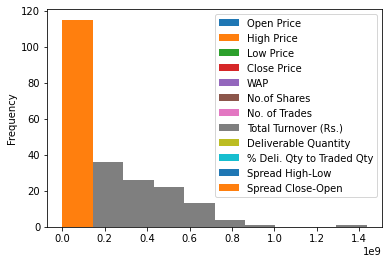

In [ ]:
df_new.plot.hist()


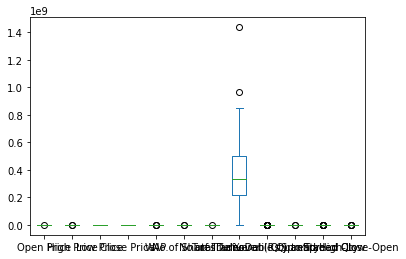

In [ ]:
df_new.plot.box()


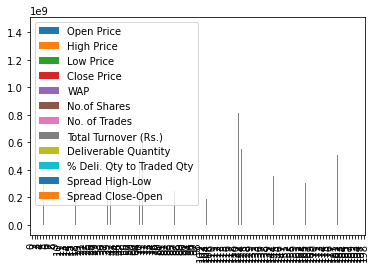

In [ ]:
df_new.plot.bar()

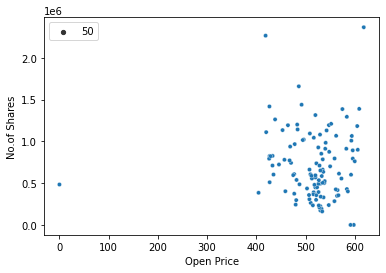

In [ ]:
import seaborn as sns
sns.scatterplot(data = df_new, x = "Open Price", y = "No.of Shares",size = 50)


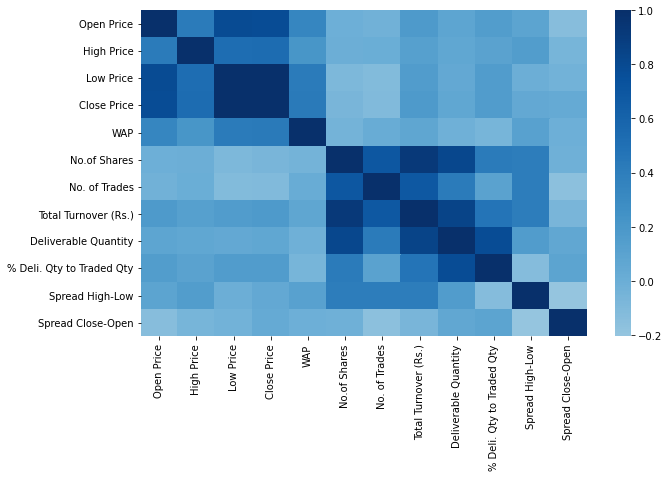

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_new.corr(), center=0, cmap='Blues')


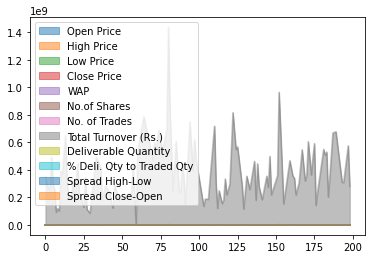

In [ ]:
df_new.plot.area(stacked=False)